## Upload Data File

In [88]:
from google.colab import files
uploaded = files.upload()

Saving heartDT.csv to heartDT (1).csv


## import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import  SelectKBest
from scipy.stats import chi2_contingency

In [90]:
df_heart=pd.read_csv('/content/heartDT.csv')
df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Investigation

In [91]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [92]:
print(df_heart.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [93]:
print(df_heart.tail())

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  


In [94]:
print(df_heart.shape)

(70000, 13)


In [95]:
print(df_heart.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [96]:
print(df_heart.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [97]:
print(df_heart.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


## Check Null Values

In [98]:
print(df_heart.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## Check Dublicate Entries

In [99]:
print(df_heart.duplicated().sum())

0


## Feature Analyzing


###  Age



### convert age into years

In [100]:
df_heart['age']=np.round(df_heart['age']/365).astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x7aee77094eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aee77097b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aee77094880>],
 'medians': [<matplotlib.lines.Line2D at 0x7aee76cd3760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aee76cd2380>],
 'means': []}

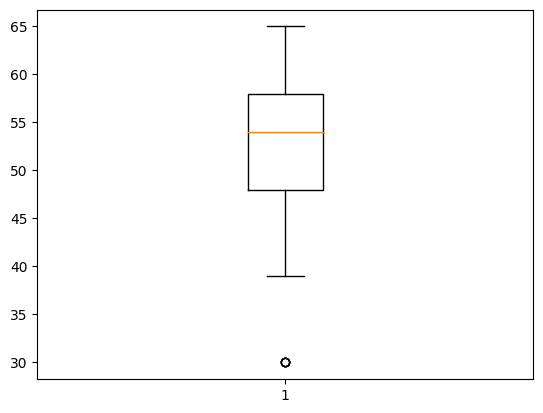

In [101]:
plt.boxplot(df_heart['age'])

<Axes: >

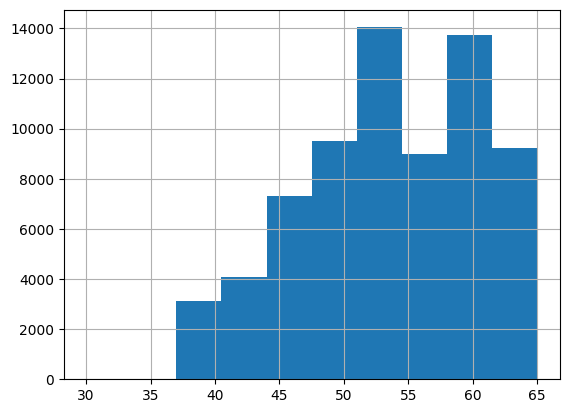

In [102]:
df_heart['age'].hist()

<Axes: ylabel='Density'>

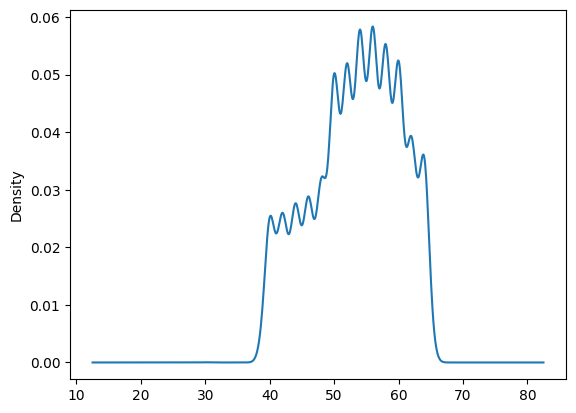

In [103]:
df_heart['age'].plot(kind='kde')

### Gender

<Axes: ylabel='Density'>

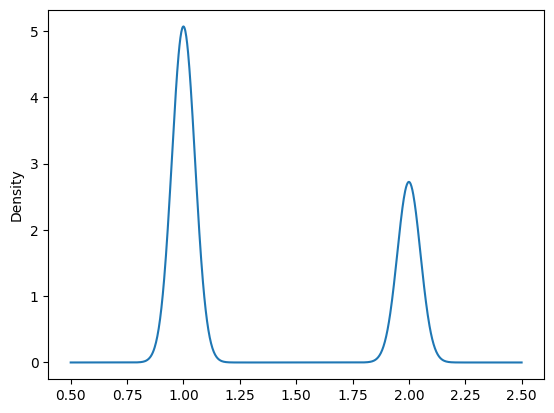

In [104]:
df_heart['gender'].plot(kind='kde')


### Height

{'whiskers': [<matplotlib.lines.Line2D at 0x7aee7196a1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aee719683a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aee71969a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7aee71968d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aee7196a470>],
 'means': []}

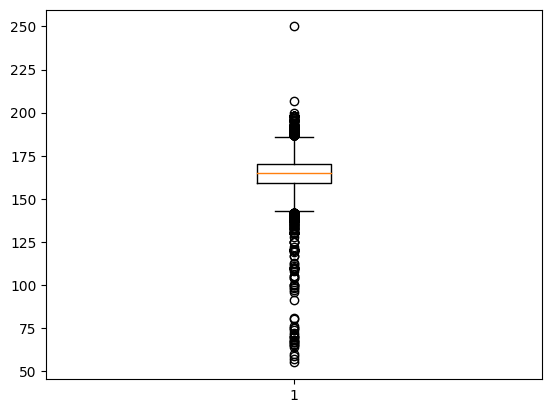

In [105]:
plt.boxplot(df_heart['height'])

### Identify Clustering

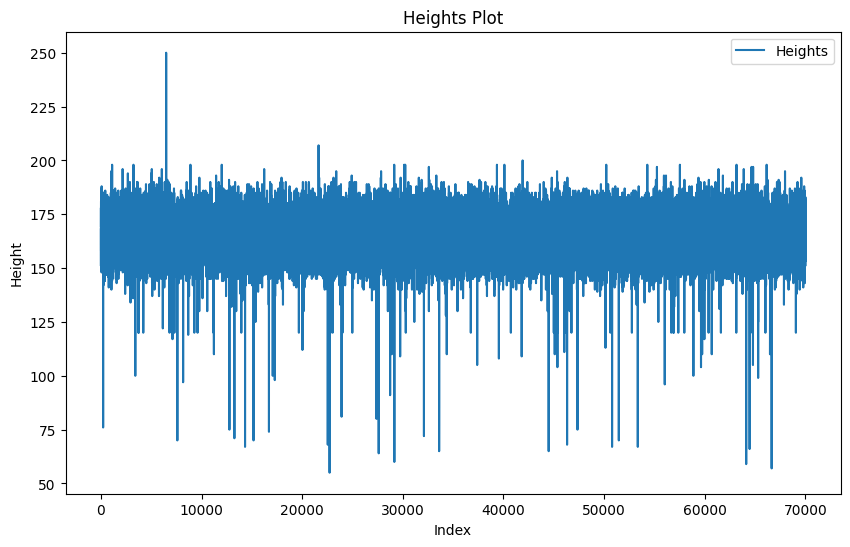

In [106]:
df_heart_height_2D=df_heart['height'].to_numpy().reshape(-1, 1)

heights = df_heart_height_2D.flatten()
plt.figure(figsize=(10, 6))
plt.plot(heights, label='Heights')
plt.xlabel('Index')
plt.ylabel('Height')
plt.title('Heights Plot')
plt.legend()
plt.show()


### Apply DB Scan Clustering Algorithm

In [107]:
dbscan = DBSCAN(eps=0.8, min_samples=10)#createdb Scan object with eps and min_samples


labels_fit_predict = dbscan.fit_predict(df_heart_height_2D)
clusters = len(set(labels_fit_predict)) - (1 if -1 in labels_fit_predict else 0)
noise_points = list(labels_fit_predict).count(-1)

print("No. of. Clusters:", clusters)
print("No. of. Noise Points:", noise_points)

No. of. Clusters: 57
No. of. Noise Points: 122


In [108]:
df_heart['DBSCAN_label']=labels_fit_predict

###Plotting clusters and noice points

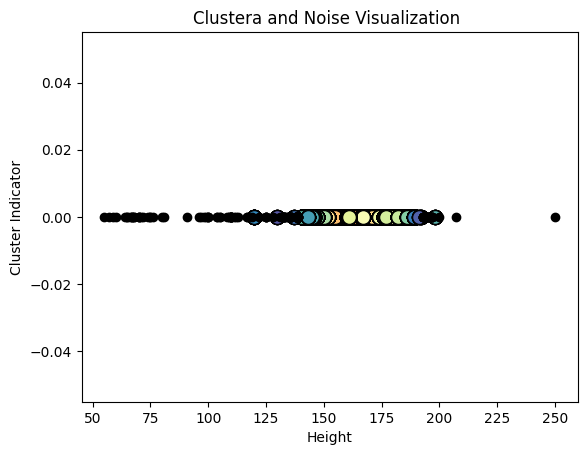

In [109]:
unique_clusters = set(labels_fit_predict) #Cluster labels for each unique data point
colors = [plt.cm.Spectral(n) for n in np.linspace(0, 1, len(unique_clusters))] #color assign for each cluster
for p, col in zip(unique_clusters, colors):
  if p == -1:
    col = [0, 0, 0, 1]
  current_cluster=(p==labels_fit_predict) #store label in existing cluster
  point_of_current_cluster = df_heart_height_2D[current_cluster]
  if point_of_current_cluster.shape[1] == 1:

        plt.plot(point_of_current_cluster[:, 0], np.zeros_like(point_of_current_cluster[:, 0]), 'o',
                 markerfacecolor=tuple(col), markeredgecolor='k', markersize=6 if p == -1 else 10)
plt.title('Clustera and Noise Visualization ')
plt.xlabel('Height')
plt.ylabel('Cluster Indicator')

plt.show()




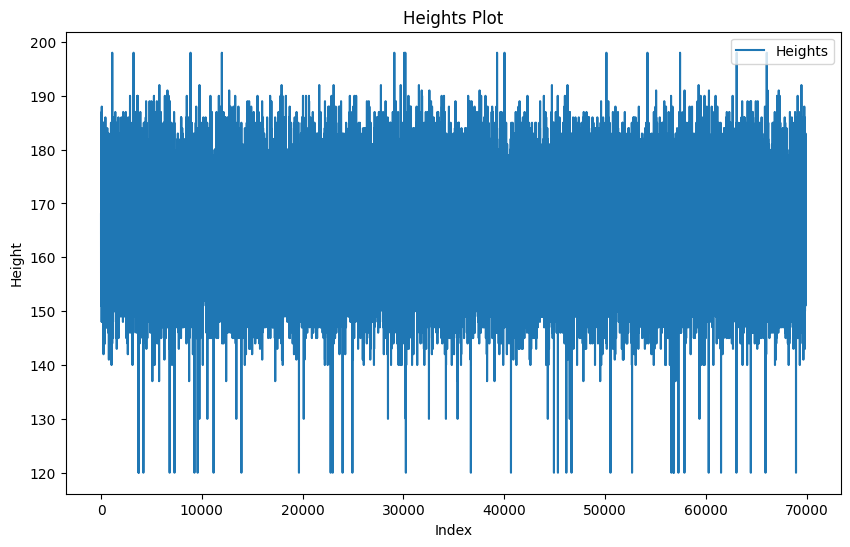

In [110]:
df_filtered_data_height = df_heart_height_2D[labels_fit_predict != -1]
heights = df_filtered_data_height.flatten()
plt.figure(figsize=(10, 6))
plt.plot(heights, label='Heights')
plt.xlabel('Index')
plt.ylabel('Height')
plt.title('Heights Plot')
plt.legend()
plt.show()

### Remove noise points

In [111]:
noise_point_heart = df_heart['DBSCAN_label'] == -1
df_heart= df_heart[~noise_point_heart].copy()

df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,DBSCAN_label
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,2
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,7
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,15


In [112]:
df_heart.drop(columns=['DBSCAN_label'], inplace=True)

In [113]:
df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


#weight

<Axes: >

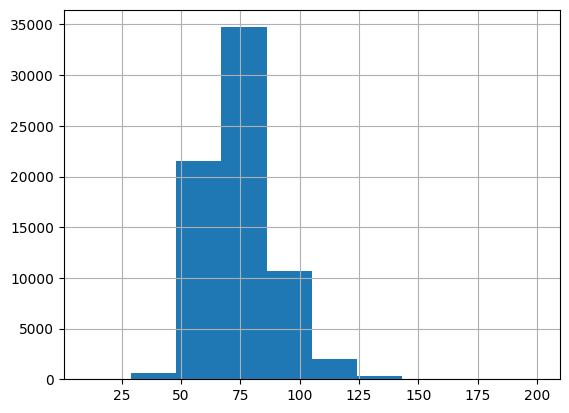

In [114]:
df_heart['weight'].hist()

Check Min and Max Value for weight


In [115]:
print('Minimum Value of Weight :', df_heart['weight'].min())
print('Maximum Value of Weight :', df_heart['weight'].max())


Minimum Value of Weight : 10.0
Maximum Value of Weight : 200.0


### Distribution Map - Weight

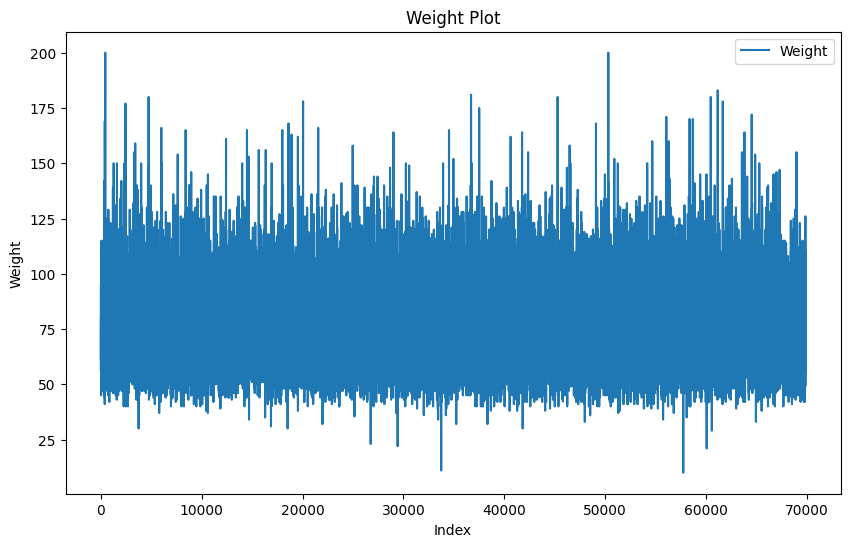

In [116]:
df_heart_weight_2D=df_heart['weight'].to_numpy().reshape(-1, 1)

weight = df_heart_weight_2D.flatten()
plt.figure(figsize=(10, 6))
plt.plot(weight, label='Weight')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weight Plot')
plt.legend()
plt.show()

### Plotting clusters and Noise points - Weight Feature

In [117]:
dbscan_weight = DBSCAN(eps=0.5, min_samples=10)


labels_fit_predict_weight = dbscan_weight.fit_predict(df_heart_weight_2D)
#print(len(labels_fit_predict_weight))
clusters_weight = len(set(labels_fit_predict_weight)) - (1 if -1 in labels_fit_predict_weight else 0)
noise_points_weight= list(labels_fit_predict_weight).count(-1)

print("No. of. Clusters:", clusters_weight)
print("No. of. Noise Points:", noise_points_weight)

df_heart['DBSCAN_label_weight']=labels_fit_predict_weight

No. of. Clusters: 55
No. of. Noise Points: 151


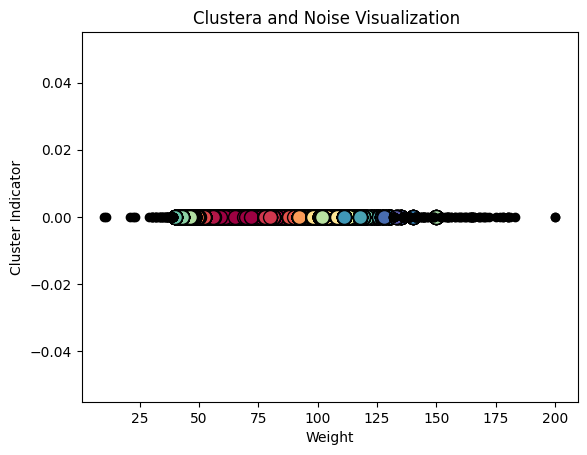

In [118]:
unique_clusters_weight = set(labels_fit_predict_weight)
colors = [plt.cm.Spectral(n) for n in np.linspace(0, 1, len(unique_clusters_weight))]
for p, col in zip(unique_clusters_weight, colors):
  if p == -1:
    col = [0, 0, 0, 1]
  current_cluster_weight=(p==labels_fit_predict_weight)
  point_of_current_cluster_weight = df_heart_weight_2D[current_cluster_weight]
  if point_of_current_cluster_weight.shape[1] == 1:

        plt.plot(point_of_current_cluster_weight[:, 0], np.zeros_like(point_of_current_cluster_weight[:, 0]), 'o',
                 markerfacecolor=tuple(col), markeredgecolor='k', markersize=6 if p == -1 else 10)
plt.title('Clustera and Noise Visualization ')
plt.xlabel('Weight')
plt.ylabel('Cluster Indicator')

plt.show()

## After Remove Noise Points

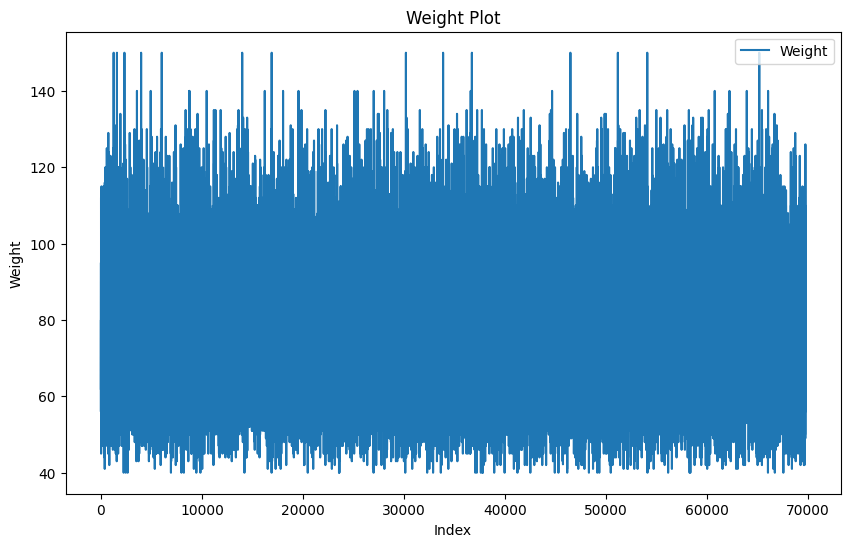

In [119]:
df_filtered_data_weight = df_heart_weight_2D[labels_fit_predict_weight != -1]
weights = df_filtered_data_weight.flatten()
plt.figure(figsize=(10, 6))
plt.plot(weights, label='Weight')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weight Plot')
plt.legend()
plt.show()


### Remove Noise points from the main Data Frame

In [120]:


noise_point_heart_weight = df_heart['DBSCAN_label_weight'] == -1
df_heart= df_heart[~noise_point_heart_weight].copy()

df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,DBSCAN_label_weight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,46
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,10
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,0


In [121]:
df_heart.drop(columns=['DBSCAN_label_weight'], inplace=True)
df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## High Pressure

In [122]:
print(df_heart['ap_hi'].max())
print(df_heart['ap_hi'].min())


16020
-150


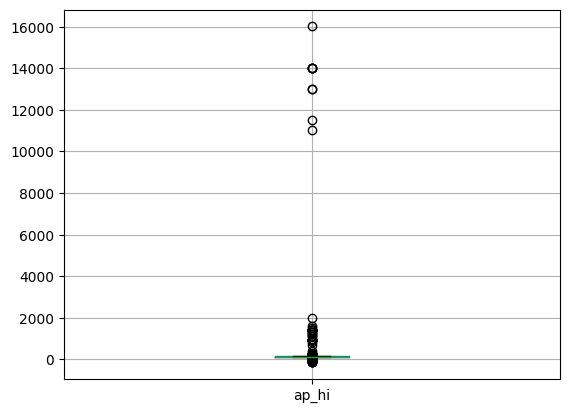

In [123]:
boxplot = df_heart.boxplot(column='ap_hi')

##Remove negative values of High Pressure Feature

In [124]:
df_heart = df_heart[df_heart['ap_hi'] >= 0]

In [125]:
print(df_heart)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   52       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   48       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53       2     168    76.0    120     80            1     1   
69996  99995   62       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1

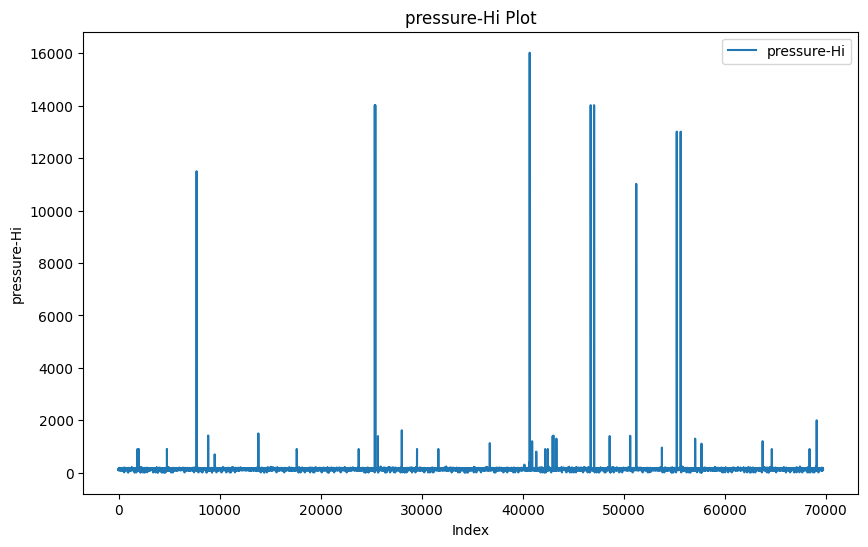

In [126]:
df_heart_p_hi_2D=df_heart['ap_hi'].to_numpy().reshape(-1, 1)

p_hi = df_heart_p_hi_2D.flatten()
plt.figure(figsize=(10, 6))
plt.plot(p_hi, label='pressure-Hi')
plt.xlabel('Index')
plt.ylabel('pressure-Hi')
plt.title('pressure-Hi Plot')
plt.legend()
plt.show()

**In this point  like to do some experiment for select best EPS and Best Min Sampling value **

In [127]:
print(df_heart['ap_hi'].max())
print(df_heart['ap_hi'].min())


16020
1


## DBSCAN Clustering for Height Pressure Feature

In [128]:
dbscan_p_hi = DBSCAN(eps=0.2, min_samples=75)
labels_fit_predict_p_hi = dbscan_p_hi.fit_predict(df_heart_p_hi_2D)
clusters_p_hi = len(set(labels_fit_predict_p_hi)) - (1 if -1 in labels_fit_predict_p_hi else 0)
noise_points_p_hi= list(labels_fit_predict_p_hi).count(-1)

print("No. of. Clusters:", clusters_p_hi)
print("No. of. Noise Points:", noise_points_p_hi)

No. of. Clusters: 17
No. of. Noise Points: 1265


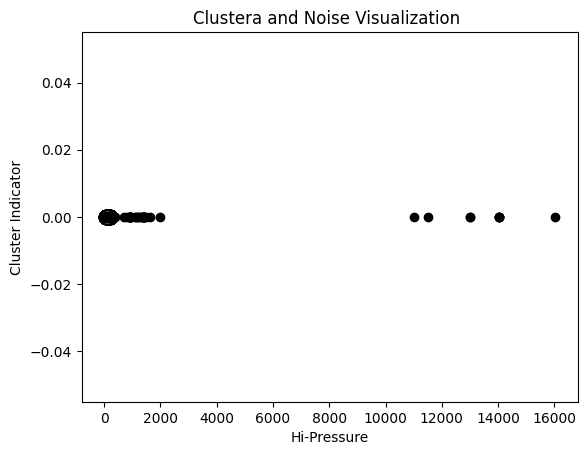

In [129]:
unique_clusters_p_hi= set(labels_fit_predict_p_hi)
colors_p_hi = [plt.cm.Spectral(s) for s in np.linspace(0, 1, len(unique_clusters_p_hi))]
for q, col_p_hi in zip(unique_clusters_p_hi, colors_p_hi):
  if q == -1:
    col_p_hi = [0, 0, 0, 1]
  current_cluster_p_hi=(q==labels_fit_predict_p_hi)
  point_of_current_cluster_p_hi= df_heart_p_hi_2D[current_cluster_p_hi]
  if point_of_current_cluster_p_hi.shape[1] == 1:

        plt.plot(point_of_current_cluster_p_hi[:, 0], np.zeros_like(point_of_current_cluster_p_hi[:, 0]), 'o',
                 markerfacecolor=tuple(col_p_hi), markeredgecolor='k', markersize=6 if q== -1 else 10)
plt.title('Clustera and Noise Visualization ')
plt.xlabel('Hi-Pressure')
plt.ylabel('Cluster Indicator')

plt.show()

## Aftere Remove the noise data points - High Blood Pressure

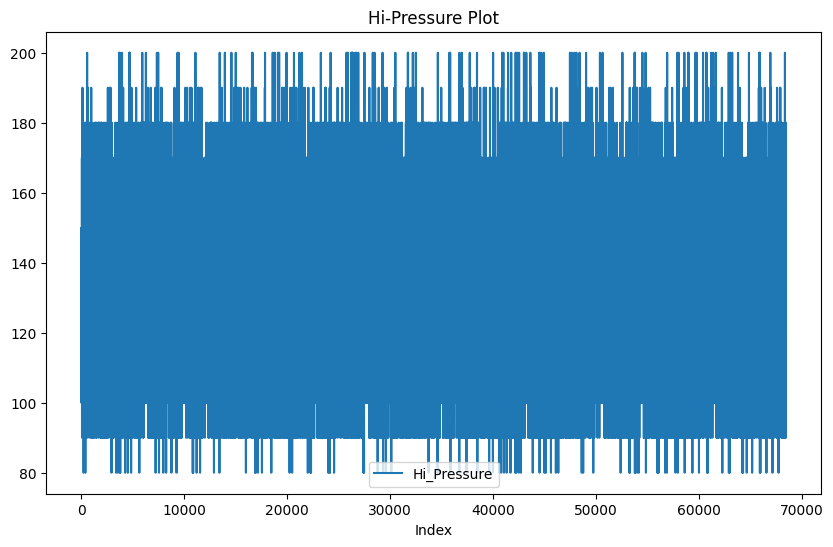

In [130]:
df_filtered_data_p_hi= df_heart_p_hi_2D[labels_fit_predict_p_hi != -1]
p_hi = df_filtered_data_p_hi.flatten()
plt.figure(figsize=(10, 6))
plt.plot(p_hi, label='Hi_Pressure')
plt.xlabel('Index')
plt.title('Hi-Pressure Plot')
plt.legend()
plt.show()

## Remove Noise Data Points from Data Frame

In [131]:
df_heart['DBSCAN_label_p_hi']=labels_fit_predict_p_hi



noise_point_heart_p_hi= df_heart['DBSCAN_label_p_hi'] == -1
df_heart= df_heart[~noise_point_heart_p_hi].copy()

df_heart.drop(columns=['DBSCAN_label_p_hi'], inplace=True)
df_heart

<ipython-input-131-85db557de9fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart['DBSCAN_label_p_hi']=labels_fit_predict_p_hi


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


# Low - Pressure  Feature Analysis

In [132]:
df_heart['ap_lo'].min()

0

In [133]:
df_heart['ap_lo'].max()

11000

{'whiskers': [<matplotlib.lines.Line2D at 0x7aee6fc0e890>,
 'caps': [<matplotlib.lines.Line2D at 0x7aee6fc0eef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aee6fc0e590>],
 'medians': [<matplotlib.lines.Line2D at 0x7aee6fc0fc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aee6fc0f550>],
 'means': []}

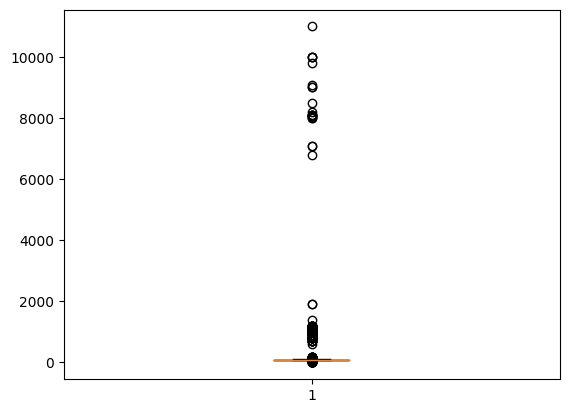

In [134]:
plt.boxplot(df_heart['ap_lo'])



# Apply DBSCAN clustering for Low- Pressure

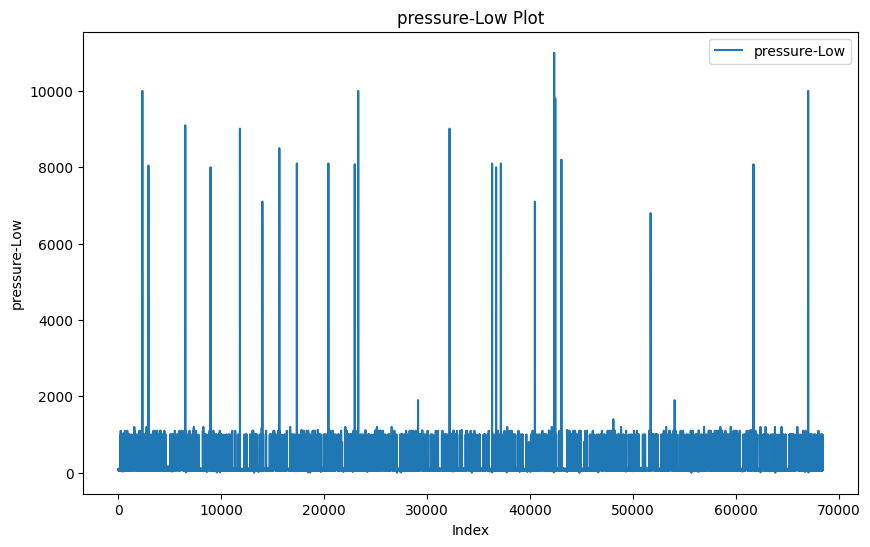

In [135]:
df_heart_p_lo_2D=df_heart['ap_lo'].to_numpy().reshape(-1, 1)

p_lo = df_heart_p_lo_2D.flatten()
plt.figure(figsize=(10, 6))
plt.plot(p_lo, label='pressure-Low')
plt.xlabel('Index')
plt.ylabel('pressure-Low')
plt.title('pressure-Low Plot')
plt.legend()
plt.show()

## DBSCAN Clustering for Low Pressure Feature






In [136]:
dbscan_p_low = DBSCAN(eps=0.5, min_samples=700)
labels_fit_predict_p_lo = dbscan_p_low.fit_predict(df_heart_p_lo_2D)
clusters_p_lo= len(set(labels_fit_predict_p_lo)) - (1 if -1 in labels_fit_predict_p_lo else 0)
noise_points_p_lo= list(labels_fit_predict_p_lo).count(-1)

print("No. of. Clusters:", clusters_p_lo)
print("No. of. Noise Points:", noise_points_p_lo)

No. of. Clusters: 5
No. of. Noise Points: 3074


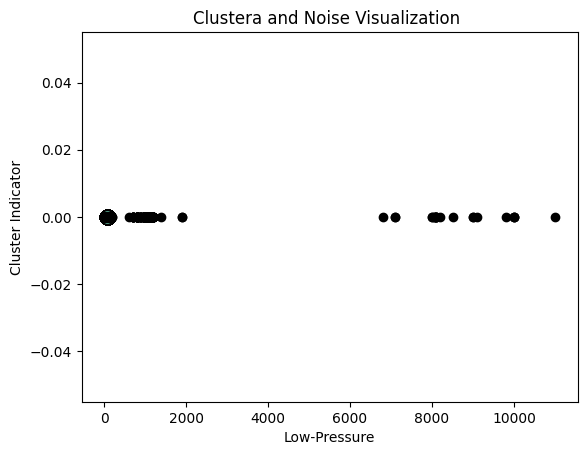

In [137]:
unique_clusters_p_lo= set(labels_fit_predict_p_lo)
colors_p_lo = [plt.cm.Spectral(l) for l in np.linspace(0, 1, len(unique_clusters_p_lo))]
for q, col_p_lo in zip(unique_clusters_p_lo, colors_p_lo):
  if q == -1:
    col_p_lo = [0, 0, 0, 1]
  current_cluster_p_lo=(q==labels_fit_predict_p_lo) #boolen array create to store current cluster True otherwise False.
  point_of_current_cluster_p_lo= df_heart_p_lo_2D[current_cluster_p_lo]
  if point_of_current_cluster_p_lo.shape[1] == 1:
        # Handle single column case
        plt.plot(point_of_current_cluster_p_lo[:, 0], np.zeros_like(point_of_current_cluster_p_lo[:, 0]), 'o',
                 markerfacecolor=tuple(col_p_lo), markeredgecolor='k', markersize=6 if q== -1 else 10)
plt.title('Clustera and Noise Visualization ')
plt.xlabel('Low-Pressure')
plt.ylabel('Cluster Indicator')

plt.show()

After removing noise data points

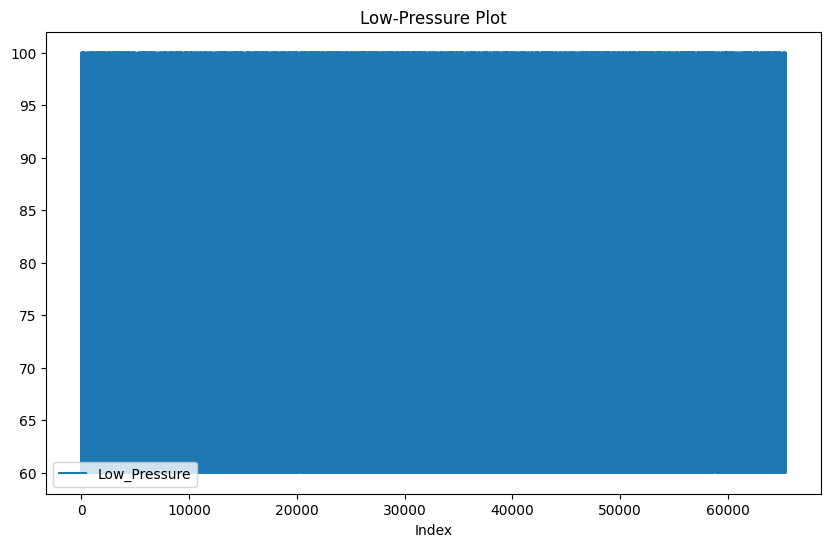

In [138]:
df_filtered_data_p_lo= df_heart_p_lo_2D[labels_fit_predict_p_lo != -1]
p_lo = df_filtered_data_p_lo.flatten()
plt.figure(figsize=(10, 6))
plt.plot(p_lo, label='Low_Pressure')
plt.xlabel('Index')
plt.title('Low-Pressure Plot')
plt.legend()
plt.show()

In [139]:
print(df_filtered_data_p_lo.max())
print(df_filtered_data_p_lo.min())

100
60


# Remove Low - Pressure Noise Data Points from the Data Frame

In [140]:
df_heart['DBSCAN_label_p_lo']=labels_fit_predict_p_lo
noise_point_heart_p_lo= df_heart['DBSCAN_label_p_lo'] == -1
df_heart= df_heart[~noise_point_heart_p_lo].copy()

df_heart.drop(columns=['DBSCAN_label_p_lo'], inplace=True)
df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## Feature Analysis - Cholesterol


In [141]:
df_heart['cholesterol'].isnull().sum()

0

(array([49284.,     0.,     0.,     0.,     0.,  8727.,     0.,     0.,
            0.,  7370.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

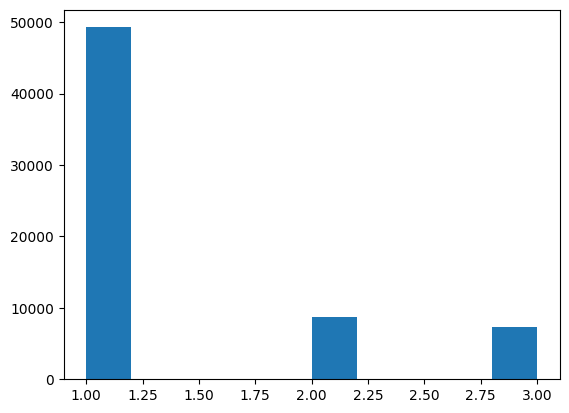

In [142]:
plt.hist(df_heart['cholesterol'])

In [143]:
count=df_heart.groupby('cholesterol').size()
print(count)

cholesterol
1    49284
2     8727
3     7370
dtype: int64


# Feature Analysis- Glucouse

(array([55732.,     0.,     0.,     0.,     0.,  4694.,     0.,     0.,
            0.,  4955.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

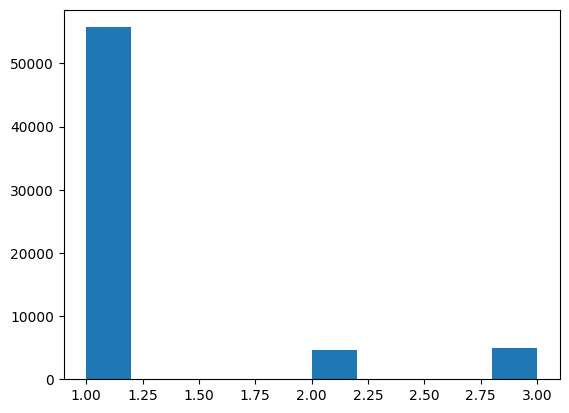

In [144]:
plt.hist(df_heart['gluc'])

In [145]:
count=df_heart.groupby('gluc').size()
print(count)

gluc
1    55732
2     4694
3     4955
dtype: int64


# Feature Analysis - Smoke 0 or 1

(array([59655.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5726.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

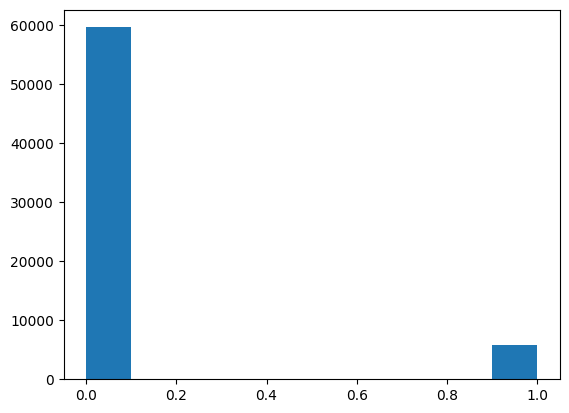

In [146]:
plt.hist(df_heart['smoke'])


In [147]:
count=df_heart.groupby('smoke').size()
print(count)

smoke
0    59655
1     5726
dtype: int64


# Feature Analysis - Alcohol usage 0 or 1

(array([61974.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3407.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

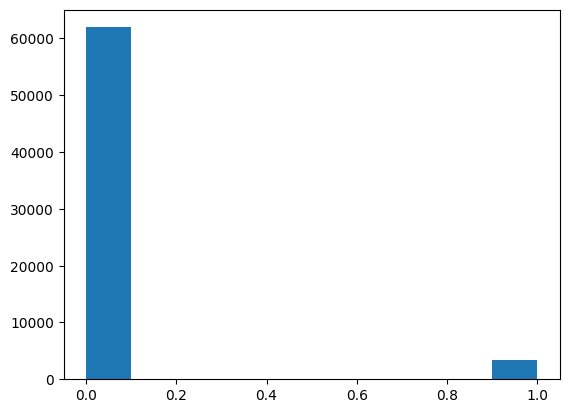

In [148]:
plt.hist(df_heart['alco'])

In [149]:
count=df_heart.groupby('alco').size()
print(count)

alco
0    61974
1     3407
dtype: int64


# Active feature Analysis 0 or 1

(array([12766.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 52615.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

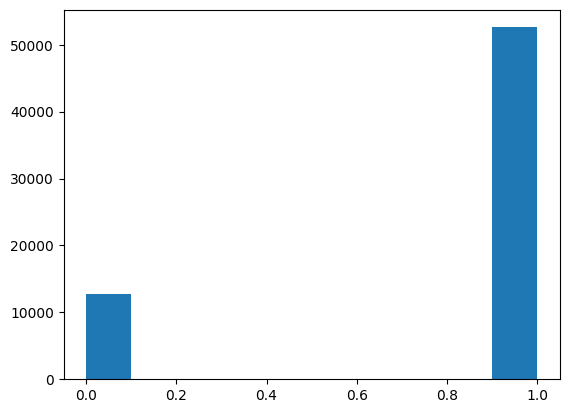

In [150]:
plt.hist(df_heart['active'])

In [151]:
count=df_heart.groupby('active').size()
print(count)

active
0    12766
1    52615
dtype: int64


# Introduced BMI = weight/height* height

In [152]:
df_heart=df_heart.drop(['id'], axis=1)

In [153]:
df_heart['BMI'] =df_heart['weight']/(df_heart['height']/100 * df_heart['height']/100)
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


#Re-Arrange the Data Frame

In [154]:
df_heart=pd.DataFrame(df_heart,columns=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','BMI','cardio'])

In [155]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65381 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65381 non-null  int64  
 1   gender       65381 non-null  int64  
 2   height       65381 non-null  int64  
 3   weight       65381 non-null  float64
 4   ap_hi        65381 non-null  int64  
 5   ap_lo        65381 non-null  int64  
 6   cholesterol  65381 non-null  int64  
 7   gluc         65381 non-null  int64  
 8   smoke        65381 non-null  int64  
 9   alco         65381 non-null  int64  
 10  active       65381 non-null  int64  
 11  BMI          65381 non-null  float64
 12  cardio       65381 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.0 MB


In [156]:
df_heart.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


# Check Data Set Balace or InBalance ?

In [157]:
target_Val_Count=df_heart['cardio'].value_counts()
print(target_Val_Count)

cardio
0    33259
1    32122
Name: count, dtype: int64


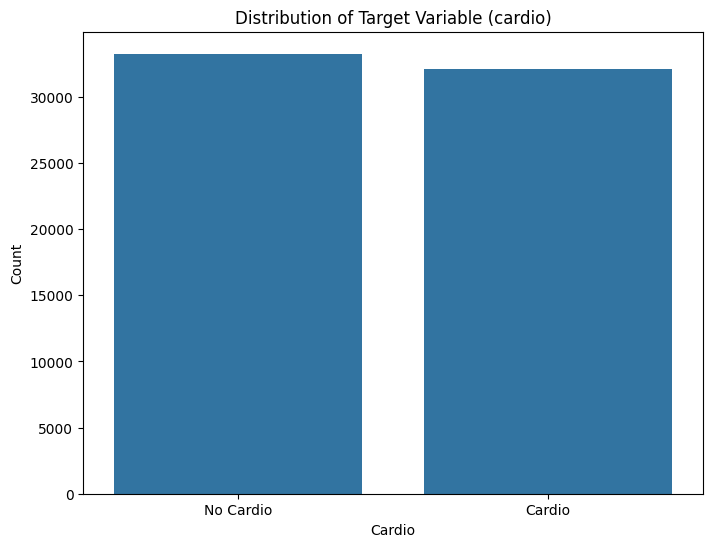

In [158]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df_heart)
plt.title('Distribution of Target Variable (cardio)')
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Cardio', 'Cardio'])
plt.show()

# **Feature Selection**   

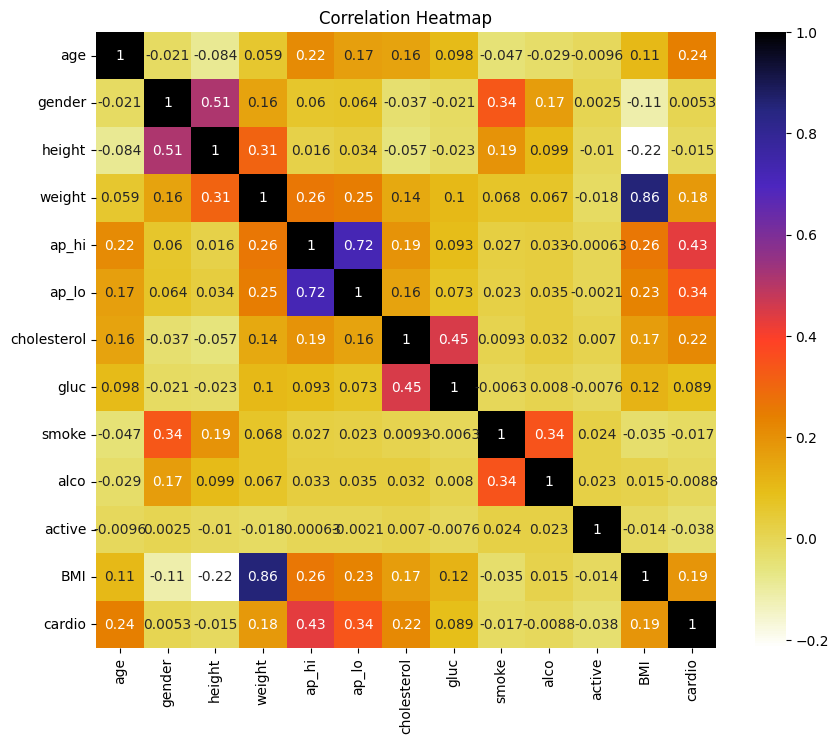

In [159]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap')
plt.show()

## Chi-Squre Test  for categorical feature relationship understanding


Chi-Square Test for gender and cardio:
Contingency Table:
cardio      0      1
gender              
1       21728  20824
2       11531  11298
Chi-Square Statistic: 1.7888627399299768
P-Value: 0.1810647881556413
Degrees of Freedom: 1
Expected Frequencies Table:
[[21645.9975834 20906.0024166]
 [11613.0024166 11215.9975834]]


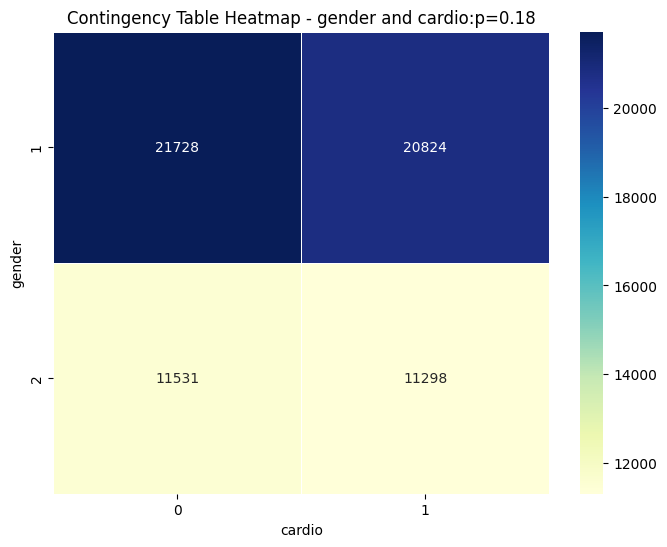


Chi-Square Test for cholesterol and cardio:
Contingency Table:
cardio           0      1
cholesterol              
1            27953  21331
2             3544   5183
3             1762   5608
Chi-Square Statistic: 3185.7839659964657
P-Value: 0.0
Degrees of Freedom: 2
Expected Frequencies Table:
[[25070.53358009 24213.46641991]
 [ 4439.38289411  4287.61710589]
 [ 3749.08352579  3620.91647421]]


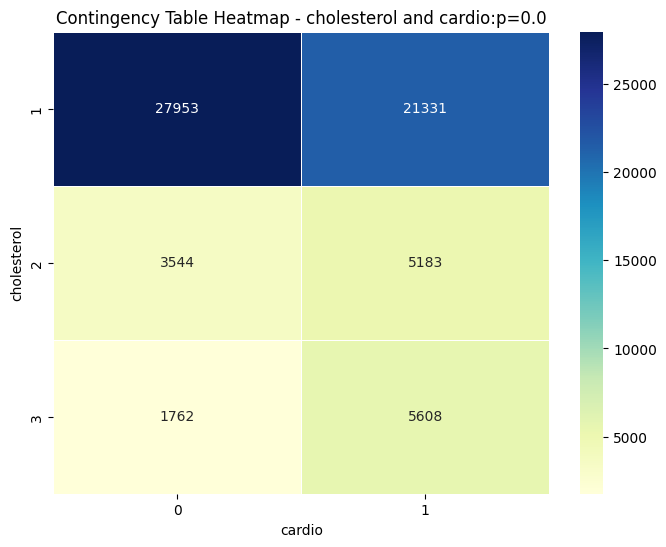


Chi-Square Test for gluc and cardio:
Contingency Table:
cardio      0      1
gluc                
1       29389  26343
2        1965   2729
3        1905   3050
Chi-Square Statistic: 535.8022001230692
P-Value: 4.487769549577958e-117
Degrees of Freedom: 2
Expected Frequencies Table:
[[28350.60014377 27381.39985623]
 [ 2387.81520625  2306.18479375]
 [ 2520.58464997  2434.41535003]]


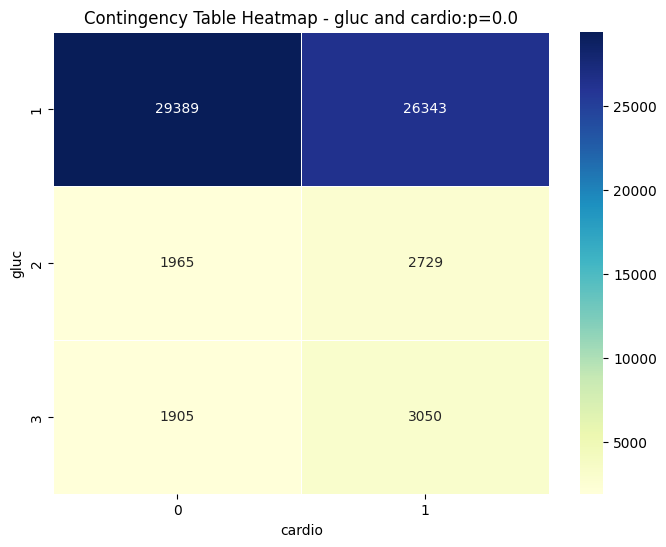


Chi-Square Test for smoke and cardio:
Contingency Table:
cardio      0      1
smoke               
0       30188  29467
1        3071   2655
Chi-Square Statistic: 19.04893401977086
P-Value: 1.2740892422436573e-05
Degrees of Freedom: 1
Expected Frequencies Table:
[[30346.2113611 29308.7886389]
 [ 2912.7886389  2813.2113611]]


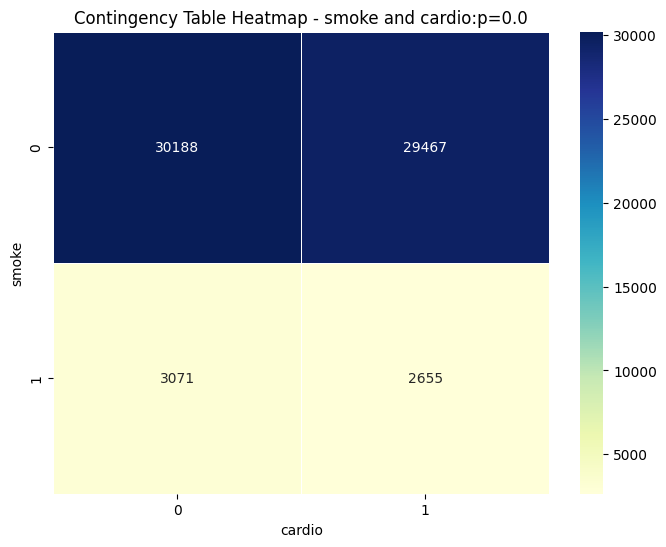


Chi-Square Test for alco and cardio:
Contingency Table:
cardio      0      1
alco                
0       31462  30512
1        1797   1610
Chi-Square Statistic: 4.976271120807894
P-Value: 0.025697313942139904
Degrees of Freedom: 1
Expected Frequencies Table:
[[31525.875499 30448.124501]
 [ 1733.124501  1673.875499]]


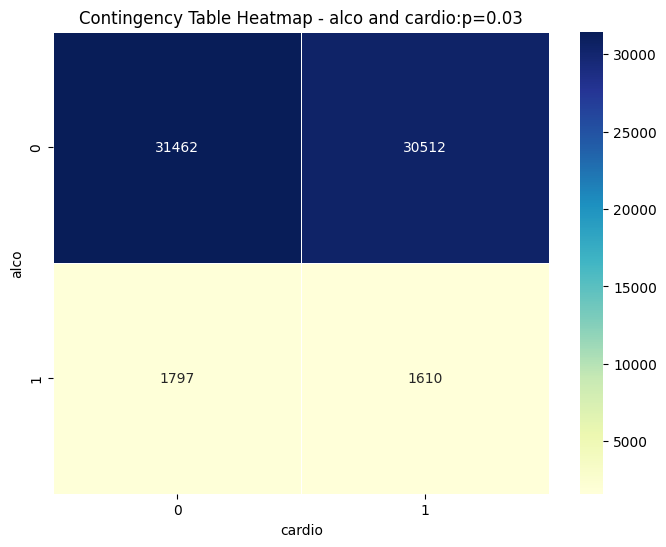


Chi-Square Test for active and cardio:
Contingency Table:
cardio      0      1
active              
0        6004   6762
1       27255  25360
Chi-Square Statistic: 93.32301779948911
P-Value: 4.441960665039694e-22
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 6494.00275309  6271.99724691]
 [26764.99724691 25850.00275309]]


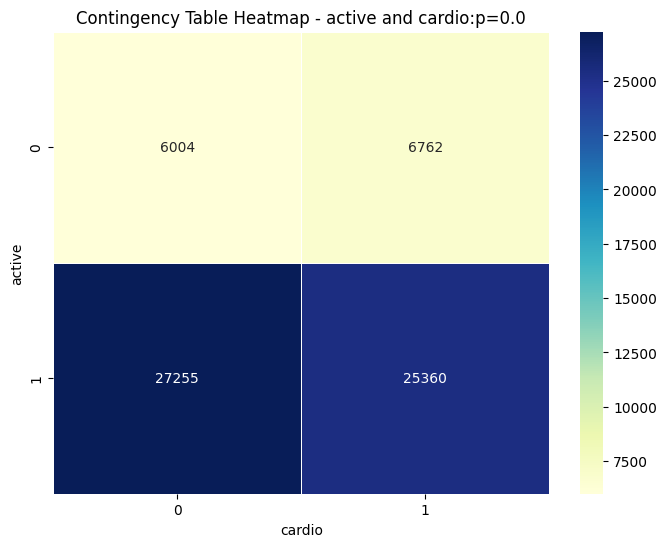

In [177]:
def analyze_categorical_features_chi(df_heart, feature, target):
  for cat_feature in feature:    #iteration
    con_table = pd.crosstab(df_heart[cat_feature], df_heart[target])
    chi2, p, dof, expected = chi2_contingency(con_table)  # chi-Square Test
    print(f"\nChi-Square Test for {cat_feature} and {target}:")
    print("Contingency Table:")
    print(con_table)
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies Table:\n{expected}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(con_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
    plt.title(f'Contingency Table Heatmap - {cat_feature} and {target}:p={np.round(p,2)}')
    plt.xlabel(target)
    plt.ylabel(cat_feature)
    plt.show()
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'] #assing categorical features
target = 'cardio' #target
analyze_categorical_features_chi(df_heart, features, target)


# Split the Data Set - Train and Test

In [161]:
X=df_heart.drop(['cardio'],axis=1)
y=df_heart['cardio']

In [162]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,26.927438
69996,62,1,158,126.0,140,90,2,2,0,0,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251


In [163]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Continue...

Check Co-relation Between Feature Variables

To optimize our feature set, i aim to identify and remove highly correlated features. Despite the correlation between BMI and weight through height, i have decided to keep both features. This allows our application to handle them separately, ensuring better analysis and user-specific insights.









Feature Selection - Mutual Information Classifier


In [165]:
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.02963094, 0.00926062, 0.        , 0.01371942, 0.11800938,
       0.07413696, 0.02513524, 0.00419409, 0.00404631, 0.00245597,
       0.00815472, 0.02335414])

In [166]:
mutual_info1=pd.Series(mutual_info)
mutual_info1.index=X_train.columns
mutual_info1.sort_values(ascending=False)

,0
ap_hi,0.118009
ap_lo,0.074137
age,0.029631
cholesterol,0.025135
BMI,0.023354
weight,0.013719
gender,0.009261
active,0.008155
gluc,0.004194
smoke,0.004046


Score base K-Best analaysis

In [167]:
ordered_Rank = SelectKBest(score_func=mutual_info_classif, k=12)
ordered_feature = ordered_Rank.fit(X, y)
ordered_feature.scores_

array([0.0336006 , 0.00615003, 0.00309097, 0.01735528, 0.11901554,
       0.07048888, 0.02930807, 0.00651721, 0.00392211, 0.        ,
       0.00716812, 0.02017466])

In [168]:
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': ordered_feature.scores_
})

In [169]:

feature_scores = feature_scores.sort_values(by='Score', ascending=False)


In [170]:
feature_rank=pd.DataFrame(ordered_feature.scores_, columns=['Score'], index=X_train.columns).sort_values(by='Score', ascending=False)

In [171]:
feature_rank


,Score
ap_hi,0.119016
ap_lo,0.070489
age,0.033601
cholesterol,0.029308
BMI,0.020175
weight,0.017355
active,0.007168
gluc,0.006517
gender,0.006150
smoke,0.003922


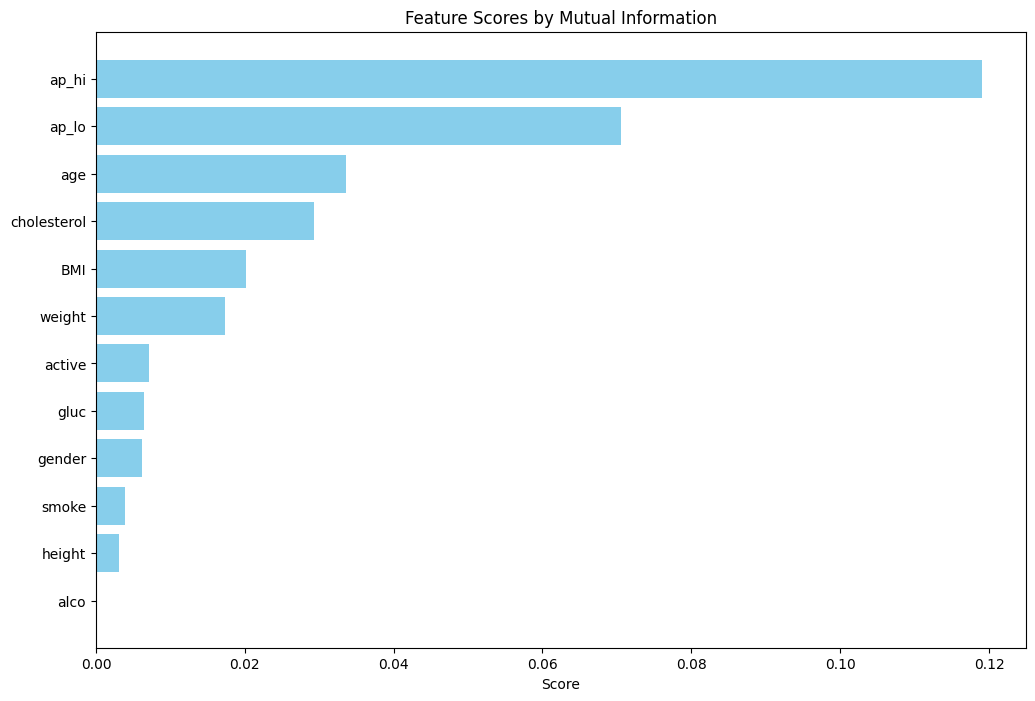

In [172]:
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Feature Scores by Mutual Information')
plt.gca().invert_yaxis()

Feature scoring - Correlation Evaluvation


Correlation of each feature with the target variable:

cardio         1.000000
ap_hi          0.432021
ap_lo          0.342269
age            0.241406
cholesterol    0.220733
BMI            0.189330
weight         0.178757
gluc           0.088757
gender         0.005263
alco          -0.008793
height        -0.014725
smoke         -0.017123
active        -0.037819
Name: cardio, dtype: float64


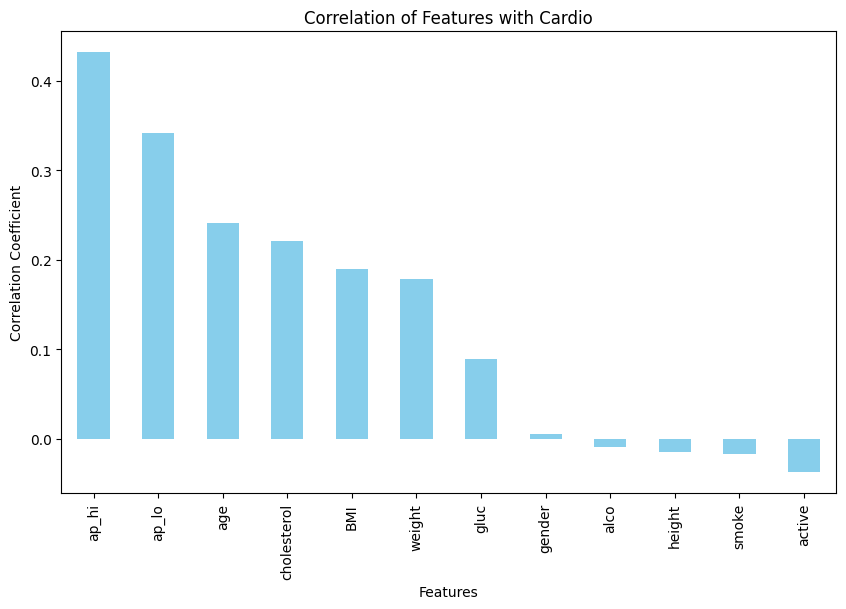

In [173]:
correlation_matrix = df_heart.corr()
#cadio_correlation = correlation_matrix['cardio'].sort_values(ascending=False)
cardio_correlation = correlation_matrix['cardio'].sort_values(ascending=False)

print("Correlation of each feature with the target variable:\n")
print(cardio_correlation)

plt.figure(figsize=(10, 6))
cardio_correlation.drop('cardio').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Cardio')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# Machine Learning Model Evaluvation

Export Data Frame to CSV for future works

In [174]:
df_heart.to_csv('heartDT_Filtered.csv', index=False)